# Pymaceuticals Inc.
---

### Analysis

The given dataset compares the effectiveness of 10 different drug regimens against tumor volume in 248 mouse test subjects.

- In general, drug regimens were less effective as mice increased in weight, as evidenced by the correlation between average tumor volume and mouse weight.
- Ceftamin's test subject pool contained roughly 20% fewer mice than the next fewest drug regimens and roughly 30% fewer mice than the drug regimens with the most mice. Difference in sample size could factor into the apparent success of the trials
- Tumor volume standard deviation and variance is higher in the less effective drug regimens and lower in those that were more effective. This may lend to arguments about the efficiency of certain drugs.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata, study_results, how="right")
# Display the data table for preview
complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [2]:
# Checking the number of mice.
number_mice_array = pd.unique(complete_df["Mouse ID"])
number_mice = len(number_mice_array)
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = complete_df[complete_df.duplicated()==True]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate = complete_df.loc[complete_df["Mouse ID"] == "g989"]
all_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_df[complete_df["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_clean_array = pd.unique(clean_df["Mouse ID"])
number_clean = len(number_clean_array)
number_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor = clean_df.groupby(["Drug Regimen"]).mean(numeric_only=True)
median_tumor = clean_df.groupby(["Drug Regimen"]).median(numeric_only=True)
var_tumor = clean_df.groupby(["Drug Regimen"]).var(numeric_only=True)
std_tumor = clean_df.groupby(["Drug Regimen"]).std(numeric_only=True)
sem_tumor = clean_df.groupby(["Drug Regimen"]).sem(numeric_only=True)

summary_by_drug = pd.DataFrame({"Mean Tumor Volume":mean_tumor["Tumor Volume (mm3)"], "Median Tumor Volume":median_tumor["Tumor Volume (mm3)"],
                                "Tumor Volume Variance":var_tumor["Tumor Volume (mm3)"], "Tumor Volume Std. Dev.":std_tumor["Tumor Volume (mm3)"],
                                "Tumor Volume Std. Err.":sem_tumor["Tumor Volume (mm3)"]})

summary_by_drug


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_by_drug = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].aggregate(["mean", "median", "var", "std", "sem"])

agg_by_drug

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

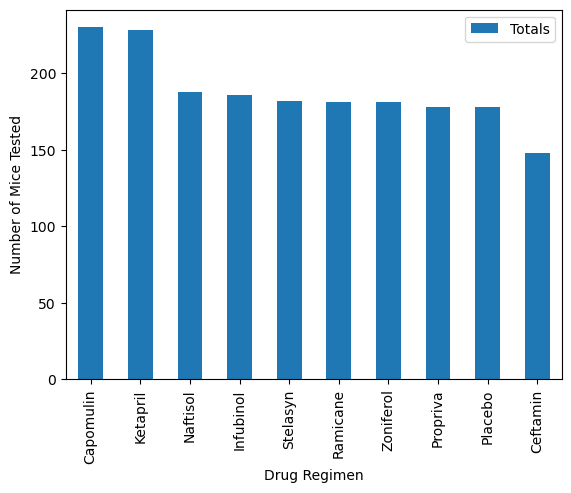

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugs_list = clean_df["Drug Regimen"].unique()
count = pd.DataFrame({"Drug Regimen":drugs_list, "Totals":pd.Series(clean_df["Drug Regimen"]).value_counts()})
count = count.set_index("Drug Regimen")
count_list = count["Totals"]

pd_bar = count.plot.bar()
pd_bar.set_xlabel("Drug Regimen")
pd_bar.set_ylabel("Number of Mice Tested")

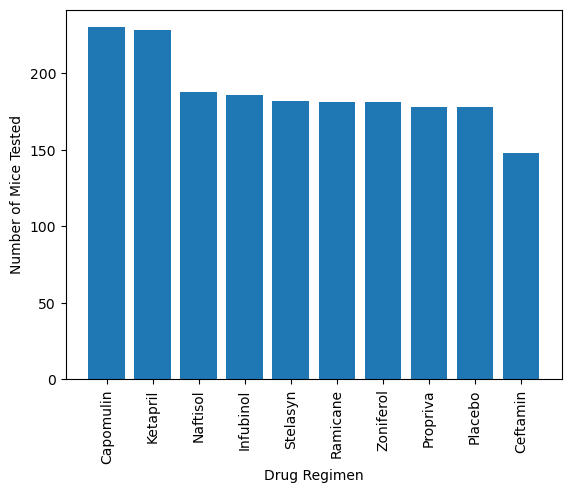

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drugs_list, count_list, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation = 90)
plt.show()

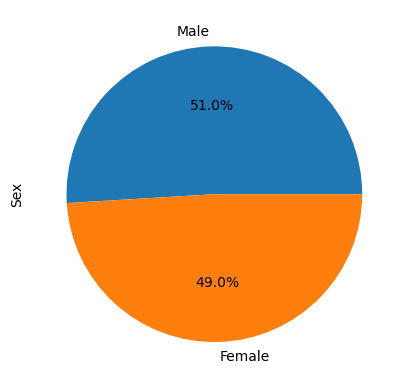

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_df["Sex"].value_counts()
pd_pie = sex_counts.plot.pie(autopct = '%.1f%%')


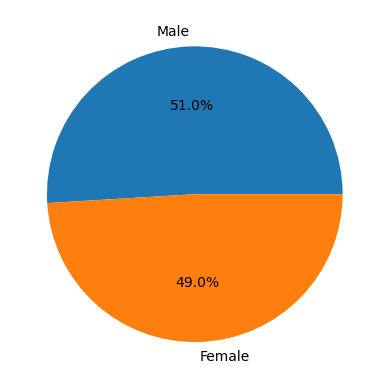

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(sex_counts, labels=labels, autopct = '%.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time_df = pd.DataFrame(clean_df.groupby("Mouse ID")["Timepoint"].max()).reset_index().rename(columns={"Timepoint": "Max_Timepoint"})
#max_time_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, max_time_df)
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint
0,b128,Capomulin,Female,9,22,0,45.000000,0,45
1,b128,Capomulin,Female,9,22,5,45.651331,0,45
2,b128,Capomulin,Female,9,22,10,43.270852,0,45
3,b128,Capomulin,Female,9,22,15,43.784893,0,45
4,b128,Capomulin,Female,9,22,20,42.731552,0,45
...,...,...,...,...,...,...,...,...,...
1875,m601,Capomulin,Male,22,17,25,33.118756,1,45
1876,m601,Capomulin,Male,22,17,30,31.758275,1,45
1877,m601,Capomulin,Male,22,17,35,30.834357,1,45
1878,m601,Capomulin,Male,22,17,40,31.378045,1,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
four_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in four_drugs:

    df1 = merged_df.loc[merged_df["Drug Regimen"] == drug]
    tumor_vol_df = df1.loc[df1["Timepoint"] == df1["Max_Timepoint"]]

    # Locate the rows which contain mice on each drug and get the tumor volumes
    vol_by_mouse = tumor_vol_df["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(vol_by_mouse)
    
    # Determine outliers using upper and lower bounds
    quartiles = vol_by_mouse.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #outliers = outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    outliers = (vol_by_mouse.loc[(tumor_vol_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (tumor_vol_df['Tumor Volume (mm3)'] <= lower_bound)])
    
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 214    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


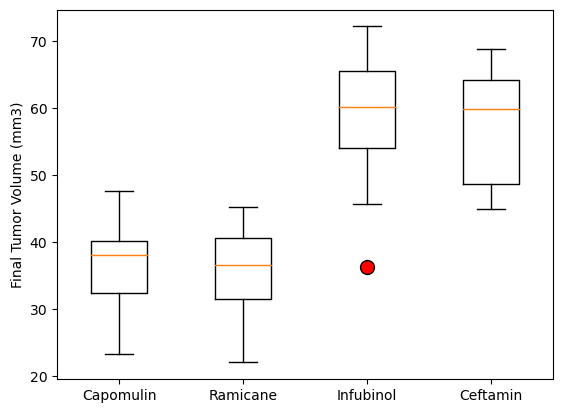

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=10)

plt.boxplot(tumor_vol_data, flierprops=flierprops)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

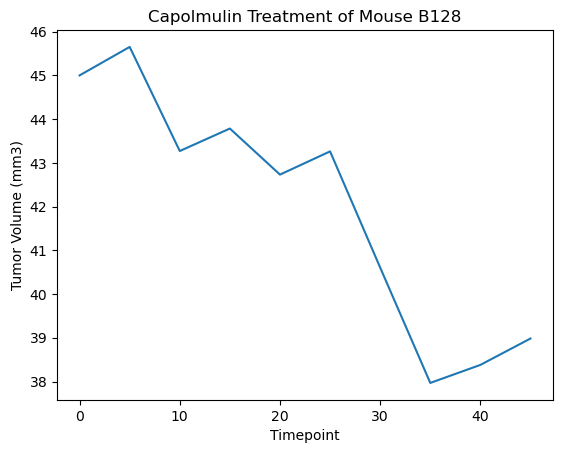

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Dataframe with mouse-specific info
b128_df = clean_df.loc[clean_df["Mouse ID"] == "b128"]

plt.plot(b128_df["Timepoint"], b128_df["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse B128")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

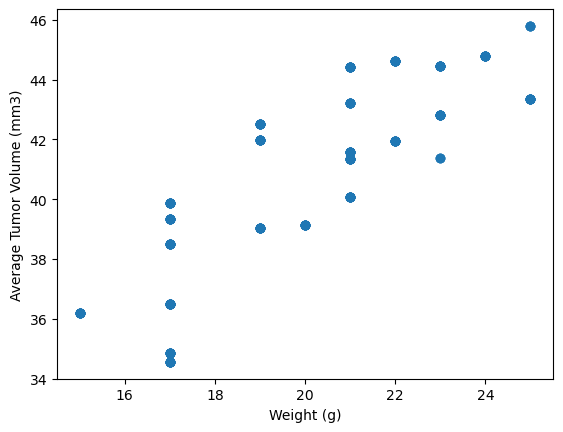

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

# Create new dataframes to hold scatterplot data
avg_tumor_vol = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
avg_tumor_vol
scatter_df = pd.merge(capomulin_df, avg_tumor_vol, on="Mouse ID")
scatter_df = scatter_df.rename(columns={"Tumor Volume (mm3)_y": "Average Tumor Volume"})
scatter_df
x = scatter_df["Weight (g)"]
y = scatter_df["Average Tumor Volume"]
#Generate scatter plot
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The coorelation between mouse weight and the average tumor volume is 0.83


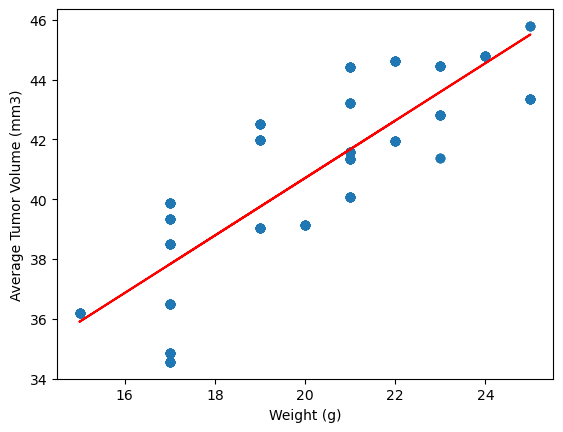

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
avg_tumor_vol = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
scatter_df = pd.merge(capomulin_df, avg_tumor_vol, on="Mouse ID")
scatter_df = scatter_df.rename(columns={"Tumor Volume (mm3)_y": "Average Tumor Volume"})
x = scatter_df["Weight (g)"]
y = scatter_df["Average Tumor Volume"]
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


# Correlation coefficient
correlation = st.pearsonr(x, y)
print(f"The coorelation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)

# Get regression values
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")
plt.show()
